<a href="https://colab.research.google.com/github/CHANWOO97/gis_2ban_1/blob/master/BIG_CONTEST_woo_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/gdrive', force_remount=True)
PATH_b = "/gdrive/MyDrive/2021빅콘테스트/SPORTS/01_제공데이터/"  # 야구 PATH
PATH_df = "/gdrive/MyDrive/2021빅콘테스트/df_year_update/" # 야구 전처리 PATh

Mounted at /gdrive


In [2]:
from google.colab import drive

drive.mount('/gdrive', force_remount=True)
PATH_b = "/gdrive/MyDrive/2021빅콘테스트/SPORTS/01_제공데이터/"  # 야구 PATH
PATH_df = "/gdrive/MyDrive/2021빅콘테스트/df_year_update/" # 야구 전처리 PATh

Mounted at /gdrive


In [3]:
### external modules ###
import pandas as pd
import numpy as np

In [4]:
!pip install mglearn
import mglearn

     |████████████████████████████████| 540 kB 4.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=092f13284b516b1ae09493cc8294804fa5f9563cc757c27fe8b1fbff5d917003
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,381 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and d

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 전처리 데이터 
# 전체 열 각각의 산점도 및 상관계수 

In [7]:
df_1064 = pd.read_csv(PATH_df + 'data(1064).csv')
df_1097 = pd.read_csv(PATH_df + 'data(1097).csv')

In [8]:
df_1064.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_1097.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [9]:
df_1097.head()

,연도,선수코드,팀코드,포지션,나이,경기,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,OBP,BARREL,연봉,팀순위,OPS,내,외,투,포,NAME,총생산평균,순수장타율,HIT_VEL,HIT_ANG_VER,PIT_VEL
0,2018,60605,HT,내,31,56,87,76,0.263,20,1,29,0.382,0,8,12,0,0,2,0.333333,1.149425,3500.0,5.0,0.715333,1.0,0.0,0.0,0.0,홍재호,0.245500,0.119,121.912857,15.414286,133.936190
1,2018,65586,LT,내,25,27,77,66,0.364,24,3,40,0.606,1,9,24,0,1,1,0.441558,1.298701,2700.0,7.0,1.047558,1.0,0.0,0.0,0.0,전병우,0.350201,0.242,134.952821,15.812821,137.105897
2,2018,68244,OB,외,29,21,71,65,0.138,9,1,16,0.246,1,4,17,1,1,0,0.197183,5.633803,82110.0,1.0,0.443183,0.0,1.0,0.0,0.0,파레디스,0.150232,0.108,138.111136,21.136364,133.465682
3,2018,63593,LT,외,28,39,71,62,0.226,14,0,15,0.242,0,6,13,0,2,2,0.314286,0.000000,2800.0,7.0,0.556286,0.0,1.0,0.0,0.0,조홍석,0.201929,0.016,122.164167,8.502778,133.431667
4,2018,75151,SK,외,31,73,239,217,0.272,59,11,101,0.465,1,19,29,1,2,8,0.334728,3.765690,30000.0,2.0,0.799728,0.0,1.0,0.0,0.0,정의윤,0.266878,0.193,131.313018,18.130769,134.104852


In [10]:
from scipy.stats import skew

f_index = df_1097.dtypes[ df_1097.dtypes != 'object' ].index
skew_features = df_1097[f_index].apply(lambda x : skew(x))

skew_features_top = skew_features[ skew_features > 1 ]
skew_features_top.sort_values(ascending=False)

투         9.403602
고의4구      3.595821
연봉        3.379023
홈런        2.497455
사구        2.251820
포         2.017147
희생플라이     1.962760
병살타       1.600762
BARREL    1.579651
루타        1.352539
볼넷        1.320094
삼진        1.220349
안타        1.154517
dtype: float64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


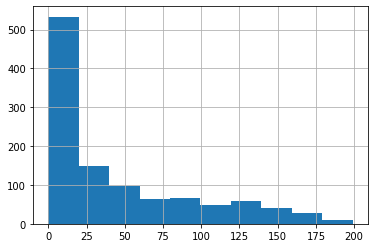

In [11]:
df_1097['안타'].hist()

### 이상치 제거

In [12]:

df_1097[skew_features_top.index] = np.round(np.log1p(df_1097[skew_features_top.index]), 4)

In [13]:
df_1097.drop(['연도', '선수코드', 'NAME', '팀코드', '포지션'], axis = 1, inplace = True)

In [14]:
df_1097.head()

,나이,경기,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,OBP,BARREL,연봉,팀순위,OPS,내,외,투,포,총생산평균,순수장타율,HIT_VEL,HIT_ANG_VER,PIT_VEL
0,31,56,87,76,0.263,3.0445,0.6931,3.4012,0.382,0.0000,2.1972,2.5649,0.0000,0.0000,1.0986,0.333333,0.7652,8.1608,5.0,0.715333,1.0,0.0,0.0,0.0,0.245500,0.119,121.912857,15.414286,133.936190
1,25,27,77,66,0.364,3.2189,1.3863,3.7136,0.606,0.6931,2.3026,3.2189,0.0000,0.6931,0.6931,0.441558,0.8323,7.9014,7.0,1.047558,1.0,0.0,0.0,0.0,0.350201,0.242,134.952821,15.812821,137.105897
2,29,21,71,65,0.138,2.3026,0.6931,2.8332,0.246,0.6931,1.6094,2.8904,0.6931,0.6931,0.0000,0.197183,1.8922,11.3158,1.0,0.443183,0.0,1.0,0.0,0.0,0.150232,0.108,138.111136,21.136364,133.465682
3,28,39,71,62,0.226,2.7081,0.0000,2.7726,0.242,0.0000,1.9459,2.6391,0.0000,1.0986,1.0986,0.314286,0.0000,7.9377,7.0,0.556286,0.0,1.0,0.0,0.0,0.201929,0.016,122.164167,8.502778,133.431667
4,31,73,239,217,0.272,4.0943,2.4849,4.6250,0.465,0.6931,2.9957,3.4012,0.6931,1.0986,2.1972,0.334728,1.5614,10.3090,2.0,0.799728,0.0,1.0,0.0,0.0,0.266878,0.193,131.313018,18.130769,134.104852


In [15]:
df = pd.get_dummies(df_1097)
print(df.shape, df_1097.shape)

(1097, 29) (1097, 29)


In [16]:
df.head()

,나이,경기,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,OBP,BARREL,연봉,팀순위,OPS,내,외,투,포,총생산평균,순수장타율,HIT_VEL,HIT_ANG_VER,PIT_VEL
0,31,56,87,76,0.263,3.0445,0.6931,3.4012,0.382,0.0000,2.1972,2.5649,0.0000,0.0000,1.0986,0.333333,0.7652,8.1608,5.0,0.715333,1.0,0.0,0.0,0.0,0.245500,0.119,121.912857,15.414286,133.936190
1,25,27,77,66,0.364,3.2189,1.3863,3.7136,0.606,0.6931,2.3026,3.2189,0.0000,0.6931,0.6931,0.441558,0.8323,7.9014,7.0,1.047558,1.0,0.0,0.0,0.0,0.350201,0.242,134.952821,15.812821,137.105897
2,29,21,71,65,0.138,2.3026,0.6931,2.8332,0.246,0.6931,1.6094,2.8904,0.6931,0.6931,0.0000,0.197183,1.8922,11.3158,1.0,0.443183,0.0,1.0,0.0,0.0,0.150232,0.108,138.111136,21.136364,133.465682
3,28,39,71,62,0.226,2.7081,0.0000,2.7726,0.242,0.0000,1.9459,2.6391,0.0000,1.0986,1.0986,0.314286,0.0000,7.9377,7.0,0.556286,0.0,1.0,0.0,0.0,0.201929,0.016,122.164167,8.502778,133.431667
4,31,73,239,217,0.272,4.0943,2.4849,4.6250,0.465,0.6931,2.9957,3.4012,0.6931,1.0986,2.1972,0.334728,1.5614,10.3090,2.0,0.799728,0.0,1.0,0.0,0.0,0.266878,0.193,131.313018,18.130769,134.104852


## 데이터프레임 정규화 - minmaxscaler

In [17]:
 from sklearn import preprocessing

x = df.values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = np.round(min_max_scaler.fit_transform(x), 4)

df_mm = pd.DataFrame(x_scaled, columns=df.columns)

df_mm.head()

,나이,경기,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,OBP,BARREL,연봉,팀순위,OPS,내,외,투,포,총생산평균,순수장타율,HIT_VEL,HIT_ANG_VER,PIT_VEL
0,0.5652,0.3846,0.1289,0.1297,0.263,0.5746,0.1790,0.5739,0.382,0.0000,0.4859,0.5086,0.000,0.0000,0.3333,0.3333,0.2806,0.0563,0.4444,0.3577,1.0,0.0,0.0,0.0,0.3507,0.2183,0.5736,0.4209,0.5818
1,0.3043,0.1818,0.1139,0.1126,0.364,0.6075,0.3581,0.6266,0.606,0.2702,0.5092,0.6382,0.000,0.2103,0.2103,0.4416,0.3052,0.0000,0.6667,0.5238,1.0,0.0,0.0,0.0,0.5003,0.4440,0.7312,0.4250,0.6553
2,0.4783,0.1399,0.1049,0.1109,0.138,0.4346,0.1790,0.4780,0.246,0.2702,0.3559,0.5731,0.289,0.2103,0.0000,0.1972,0.6939,0.7415,0.0000,0.2216,0.0,1.0,0.0,0.0,0.2146,0.1982,0.7694,0.4798,0.5709
3,0.4348,0.2657,0.1049,0.1058,0.226,0.5111,0.0000,0.4678,0.242,0.0000,0.4303,0.5233,0.000,0.3333,0.3333,0.3143,0.0000,0.0079,0.6667,0.2781,0.0,1.0,0.0,0.0,0.2885,0.0294,0.5766,0.3498,0.5701
4,0.5652,0.5035,0.3568,0.3703,0.272,0.7728,0.6419,0.7803,0.465,0.2702,0.6625,0.6744,0.289,0.3333,0.6667,0.3347,0.5726,0.5228,0.1111,0.3999,0.0,1.0,0.0,0.0,0.3813,0.3541,0.6872,0.4489,0.5857


### Robust Scaler

이상치에 대해 강력한 통계를 사용하여 기능을 확장합니다.

1. Robust Scaler 는 중앙값을 제거하고 분위수 범위(기본값은 IQR: 사분위수 범위)에 따라 데이터를 조정합니다. IQR은 1사분위수(25분위수)와 3사분위수(75분위수) 사이의 범위입니다.

2. 센터링 및 스케일링은 훈련 세트의 샘플에 대한 관련 통계를 계산하여 각 기능에서 독립적으로 발생합니다. 그런 다음 이 transform방법을 사용하여 나중에 데이터에 사용하기 위해 중앙값 및 사분위수 범위를 저장합니다.

3. 데이터 세트의 표준화는 많은 기계 학습 추정기의 공통 요구 사항입니다. 일반적으로 평균을 제거하고 단위 분산으로 스케일링하여 수행하지만 이상치는 종종 표본 평균/분산에 부정적인 영향을 미칠 수 있어 이러한 경우 중앙값과 사분위수 범위가 더 나은 결과를 제공하는 경우가 많습니다.

In [25]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import robust_scale

X = df.values.astype(float)
transformer = RobustScaler().fit(X)

x_scaled = np.round(transformer.transform(X), 4)

x_scaled = robust_scale(x_scaled)

df = pd.DataFrame(x_scaled, columns=df.columns)

print(x_scaled.shape)
print(x_scaled[:2])
df.head()


(1097, 29)
[[ 0.4285      0.0609     -0.0676     -0.0605      0.2        -0.0174
   0.          0.          0.2722     -0.6309      0.         -0.2872
   0.         -0.4307      0.          0.1592      0.1114     -0.2549
   0.          0.2406      1.          0.          0.          0.
   0.219       0.2644     -1.17554122 -0.21241062 -0.82692067]
 [-0.4289     -0.2928     -0.1033     -0.1009      1.21        0.0476
   0.3869      0.1091      1.5167      0.          0.0472      0.0419
   0.          0.         -0.2083      1.1279      0.1596     -0.3905
   0.4001      1.4664      1.          0.          0.          0.
   1.4063      1.2811      0.2960852  -0.15780789  0.57511438]]


,나이,경기,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,OBP,BARREL,연봉,팀순위,OPS,내,외,투,포,총생산평균,순수장타율,HIT_VEL,HIT_ANG_VER,PIT_VEL
0,0.4285,0.0609,-0.0676,-0.0605,0.20,-0.0174,0.0000,0.0000,0.2722,-0.6309,0.0000,-0.2872,0.000,-0.4307,0.0000,0.1592,0.1114,-0.2549,0.0000,0.2406,1.0,0.0,0.0,0.0,0.2190,0.2644,-1.175541,-0.212411,-0.826921
1,-0.4289,-0.2928,-0.1033,-0.1009,1.21,0.0476,0.3869,0.1091,1.5167,0.0000,0.0472,0.0419,0.000,0.0000,-0.2083,1.1279,0.1596,-0.3905,0.4001,1.4664,1.0,0.0,0.0,0.0,1.4063,1.2811,0.296085,-0.157808,0.575114
2,0.1430,-0.3659,-0.1246,-0.1049,-1.05,-0.2941,0.0000,-0.1986,-0.4833,0.0000,-0.2632,-0.1234,0.289,0.0000,-0.5645,-1.0581,0.9209,1.3946,-0.7999,-0.7638,0.0,1.0,0.0,0.0,-0.8611,0.1739,0.652967,0.571929,-1.034826
3,0.0000,-0.1465,-0.1246,-0.1170,-0.17,-0.1429,-0.3867,-0.2197,-0.5056,-0.6309,-0.1126,-0.2499,0.000,0.2519,0.0000,-0.0107,-0.4381,-0.3714,0.4001,-0.3469,0.0,1.0,0.0,0.0,-0.2746,-0.5865,-1.147543,-1.159658,-1.050126
4,0.4285,0.2682,0.4733,0.5080,0.29,0.3743,1.0000,0.4274,0.7333,0.0000,0.3576,0.1338,0.289,0.2519,0.5647,0.1717,0.6833,0.8681,-0.5999,0.5520,0.0,1.0,0.0,0.0,0.4619,0.8761,-0.114894,0.160508,-0.752519


## heatmap 및 collections - pairplot
